# Risk Forecasting Notebook
    -   This notebook is created to take processed data and scan for risk

## Steps: 
    - Download Processed data
    - calculate the risk for each portfolio
    - Use Garch to showcase risk 
    - Create plots, and save them in the plot folder

In [8]:
import os
import pathlib
import sys
sys.path.append(str(pathlib.Path(os.getcwd()).parent))

In [9]:
from src.risk_models import RiskModel 
from src.visualization import DataVisualizer

## Get Data

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)

In [11]:
# Load processed data from CSV files
data_dir = Path("data/processed")

# Define portfolios
equity_tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA', 'NFLX', 'NVDA', 'META']
etf_tickers = ['SPY', 'QQQ', 'IWM', 'DIA', 'VTI', 'EEM', 'ARKK', 'GLD', 'SLV']
sector_tickers = ['XLF', 'XLK', 'XLY', 'XLE', 'XLV', 'XLI', 'XLB', 'XLU']

# Load equity data
print("Loading Equity Portfolio Data...")
print("=" * 60)
equity_data = {}
for ticker in equity_tickers:
    filepath = data_dir / f"Equity_{ticker}_cleaned.csv"
    if filepath.exists():
        df = pd.read_csv(filepath, index_col=0, parse_dates=True)
        equity_data[ticker] = df
        print(f"✓ Loaded {ticker}: {df.shape[0]} rows, {df.shape[1]} columns")
    else:
        print(f"✗ File not found: {filepath}")

print(f"\nTotal equity stocks loaded: {len(equity_data)}")

Loading Equity Portfolio Data...
✓ Loaded AAPL: 2515 rows, 5 columns
✓ Loaded MSFT: 2515 rows, 5 columns
✓ Loaded AMZN: 2515 rows, 5 columns
✓ Loaded GOOGL: 2515 rows, 5 columns
✓ Loaded TSLA: 2515 rows, 5 columns
✓ Loaded NFLX: 2515 rows, 5 columns
✓ Loaded NVDA: 2515 rows, 5 columns
✓ Loaded META: 2515 rows, 5 columns

Total equity stocks loaded: 8
✓ Loaded AMZN: 2515 rows, 5 columns
✓ Loaded GOOGL: 2515 rows, 5 columns
✓ Loaded TSLA: 2515 rows, 5 columns
✓ Loaded NFLX: 2515 rows, 5 columns
✓ Loaded NVDA: 2515 rows, 5 columns
✓ Loaded META: 2515 rows, 5 columns

Total equity stocks loaded: 8


In [12]:
# Load ETF data
print("\nLoading ETF Portfolio Data...")
print("=" * 60)
etf_data = {}
for ticker in etf_tickers:
    filepath = data_dir / f"ETF_{ticker}_cleaned.csv"
    if filepath.exists():
        df = pd.read_csv(filepath, index_col=0, parse_dates=True)
        etf_data[ticker] = df
        print(f"✓ Loaded {ticker}: {df.shape[0]} rows, {df.shape[1]} columns")
    else:
        print(f"✗ File not found: {filepath}")

print(f"\nTotal ETFs loaded: {len(etf_data)}")

# Load Sector ETF data
print("\nLoading Sector ETF Portfolio Data...")
print("=" * 60)
sector_data = {}
for ticker in sector_tickers:
    filepath = data_dir / f"Sector_{ticker}_cleaned.csv"
    if filepath.exists():
        df = pd.read_csv(filepath, index_col=0, parse_dates=True)
        sector_data[ticker] = df
        print(f"✓ Loaded {ticker}: {df.shape[0]} rows, {df.shape[1]} columns")
    else:
        print(f"✗ File not found: {filepath}")

print(f"\nTotal sector ETFs loaded: {len(sector_data)}")


Loading ETF Portfolio Data...
✓ Loaded SPY: 2515 rows, 5 columns
✓ Loaded QQQ: 2515 rows, 5 columns
✓ Loaded IWM: 2515 rows, 5 columns
✓ Loaded DIA: 2515 rows, 5 columns
✓ Loaded VTI: 2515 rows, 5 columns
✓ Loaded EEM: 2515 rows, 5 columns
✓ Loaded ARKK: 2512 rows, 5 columns
✓ Loaded GLD: 2515 rows, 5 columns
✓ Loaded SLV: 2515 rows, 5 columns

Total ETFs loaded: 9

Loading Sector ETF Portfolio Data...
✓ Loaded XLF: 2515 rows, 5 columns
✓ Loaded XLK: 2515 rows, 5 columns
✓ Loaded XLY: 2515 rows, 5 columns
✓ Loaded XLE: 2515 rows, 5 columns
✓ Loaded SLV: 2515 rows, 5 columns

Total ETFs loaded: 9

Loading Sector ETF Portfolio Data...
✓ Loaded XLF: 2515 rows, 5 columns
✓ Loaded XLK: 2515 rows, 5 columns
✓ Loaded XLY: 2515 rows, 5 columns
✓ Loaded XLE: 2515 rows, 5 columns
✓ Loaded XLV: 2515 rows, 5 columns
✓ Loaded XLI: 2515 rows, 5 columns
✓ Loaded XLB: 2515 rows, 5 columns
✓ Loaded XLU: 2515 rows, 5 columns

Total sector ETFs loaded: 8
✓ Loaded XLV: 2515 rows, 5 columns
✓ Loaded XLI: 

In [13]:
# Display sample data
print("\nSample Data from AAPL:")
print("=" * 60)
if 'AAPL' in equity_data:
    print(equity_data['AAPL'].head(10))
    print(f"\nColumns: {equity_data['AAPL'].columns.tolist()}")
    print(f"Date Range: {equity_data['AAPL'].index.min()} to {equity_data['AAPL'].index.max()}")


Sample Data from AAPL:
            Close_AAPL  High_AAPL   Low_AAPL  Open_AAPL  Volume_AAPL
Date                                                                
2015-01-02   24.237555  24.705324  23.798604  24.694239    212818400
2015-01-05   23.554739  24.086799  23.368519  24.006990    257142000
2015-01-06   23.556955  23.816334  23.195597  23.619029    263188400
2015-01-07   23.887280  23.987040  23.654503  23.765348    160423600
2015-01-08   24.805082  24.862723  24.097885  24.215383    237458000
2015-01-09   24.831682  25.106579  24.432637  24.977998    214798000
2015-01-12   24.219814  24.969132  24.120054  24.962481    198603200
2015-01-13   24.434855  25.006819  24.144439  24.703101    268367600
2015-01-14   24.341745  24.494711  24.053546  24.173259    195826400
2015-01-15   23.681105  24.399385  23.645635  24.386084    240056000

Columns: ['Close_AAPL', 'High_AAPL', 'Low_AAPL', 'Open_AAPL', 'Volume_AAPL']
Date Range: 2015-01-02 00:00:00 to 2024-12-30 00:00:00


## Calculate Value-at-Risk (VaR) on Portfolios

In [14]:
# Calculate VaR and ES for each equity stock
print("Calculating Risk Metrics for Equity Portfolio...")
print("=" * 80)

equity_risk_metrics = {}

for ticker, df in equity_data.items():
    print(f"\n{ticker}:")
    print("-" * 40)
    
    # Create a copy of the dataframe with simplified column names
    df_renamed = df.copy()
    column_mapping = {}
    for col in df.columns:
        if 'Close' in col:
            column_mapping[col] = 'Close'
        elif 'Open' in col:
            column_mapping[col] = 'Open'
        elif 'High' in col:
            column_mapping[col] = 'High'
        elif 'Low' in col:
            column_mapping[col] = 'Low'
        elif 'Volume' in col:
            column_mapping[col] = 'Volume'
    
    df_renamed = df_renamed.rename(columns=column_mapping)
    
    # Initialize risk model
    risk_model = RiskModel(df_renamed)
    
    # Calculate VaR at different confidence levels
    var_90 = risk_model.calculate_var(0.90)
    var_95 = risk_model.calculate_var(0.95)
    var_99 = risk_model.calculate_var(0.99)
    
    # Calculate Expected Shortfall
    es_90 = risk_model.calculate_es(0.90)
    es_95 = risk_model.calculate_es(0.95)
    es_99 = risk_model.calculate_es(0.99)
    
    # Store metrics
    equity_risk_metrics[ticker] = {
        'VaR_90': var_90,
        'VaR_95': var_95,
        'VaR_99': var_99,
        'ES_90': es_90,
        'ES_95': es_95,
        'ES_99': es_99
    }
    
    print(f"  VaR (90%): {var_90:>8.4%}")
    print(f"  VaR (95%): {var_95:>8.4%}")
    print(f"  VaR (99%): {var_99:>8.4%}")
    print(f"  ES  (90%): {es_90:>8.4%}")
    print(f"  ES  (95%): {es_95:>8.4%}")
    print(f"  ES  (99%): {es_99:>8.4%}")

Calculating Risk Metrics for Equity Portfolio...

AAPL:
----------------------------------------
  VaR (90%): -1.9228%
  VaR (95%): -2.6996%
  VaR (99%): -4.7980%
  ES  (90%): -3.1821%
  ES  (95%): -4.0718%
  ES  (99%): -6.4445%

MSFT:
----------------------------------------
  VaR (90%): -1.7675%
  VaR (95%): -2.6582%
  VaR (99%): -4.3445%
  ES  (90%): -3.0075%
  ES  (95%): -3.8806%
  ES  (99%): -6.0902%

AMZN:
----------------------------------------
  VaR (90%): -1.9228%
  VaR (95%): -2.6996%
  VaR (99%): -4.7980%
  ES  (90%): -3.1821%
  ES  (95%): -4.0718%
  ES  (99%): -6.4445%

MSFT:
----------------------------------------
  VaR (90%): -1.7675%
  VaR (95%): -2.6582%
  VaR (99%): -4.3445%
  ES  (90%): -3.0075%
  ES  (95%): -3.8806%
  ES  (99%): -6.0902%

AMZN:
----------------------------------------
  VaR (90%): -2.1028%
  VaR (95%): -3.0613%
  VaR (99%): -5.5691%
  ES  (90%): -3.5579%
  ES  (95%): -4.6008%
  ES  (99%): -7.0433%

GOOGL:
----------------------------------------
  

In [15]:
# Create a summary DataFrame of risk metrics
equity_risk_df = pd.DataFrame(equity_risk_metrics).T
equity_risk_df = equity_risk_df.round(6)

print("\nEquity Portfolio Risk Metrics Summary:")
print("=" * 80)
print(equity_risk_df)

# Display sorted by VaR 95%
print("\n\nStocks Ranked by VaR (95%) - Riskiest First:")
print("=" * 80)
print(equity_risk_df.sort_values('VaR_95')[['VaR_95', 'ES_95']])


Equity Portfolio Risk Metrics Summary:
         VaR_90    VaR_95    VaR_99     ES_90     ES_95     ES_99
AAPL  -0.019228 -0.026996 -0.047980 -0.031821 -0.040718 -0.064445
MSFT  -0.017675 -0.026582 -0.043445 -0.030075 -0.038806 -0.060902
AMZN  -0.021028 -0.030613 -0.055691 -0.035579 -0.046008 -0.070433
GOOGL -0.019115 -0.026825 -0.048365 -0.031810 -0.040845 -0.062733
TSLA  -0.036449 -0.051387 -0.090188 -0.061478 -0.079311 -0.123990
NFLX  -0.024981 -0.037280 -0.068716 -0.044921 -0.059318 -0.102238
NVDA  -0.031568 -0.044542 -0.073741 -0.051052 -0.064995 -0.097094
META  -0.022342 -0.033224 -0.057986 -0.039895 -0.053107 -0.093133


Stocks Ranked by VaR (95%) - Riskiest First:
         VaR_95     ES_95
TSLA  -0.051387 -0.079311
NVDA  -0.044542 -0.064995
NFLX  -0.037280 -0.059318
META  -0.033224 -0.053107
AMZN  -0.030613 -0.046008
AAPL  -0.026996 -0.040718
GOOGL -0.026825 -0.040845
MSFT  -0.026582 -0.038806


In [16]:
# Fit GARCH models for selected stocks
print("\nFitting GARCH Models...")
print("=" * 80)

# Fit GARCH for selected stocks
selected_tickers = ['AAPL', 'TSLA', 'NVDA']  # Select a few for detailed analysis
garch_models = {}

for ticker in selected_tickers:
    if ticker in equity_data:
        print(f"\nFitting GARCH model for {ticker}...")
        
        # Rename columns for RiskModel
        df_renamed = equity_data[ticker].copy()
        column_mapping = {}
        for col in df_renamed.columns:
            if 'Close' in col:
                column_mapping[col] = 'Close'
            elif 'Open' in col:
                column_mapping[col] = 'Open'
            elif 'High' in col:
                column_mapping[col] = 'High'
            elif 'Low' in col:
                column_mapping[col] = 'Low'
            elif 'Volume' in col:
                column_mapping[col] = 'Volume'
        
        df_renamed = df_renamed.rename(columns=column_mapping)
        
        risk_model = RiskModel(df_renamed)
        garch_fit = risk_model.fit_garch_model(p=1, q=1)
        garch_models[ticker] = garch_fit
        print(f"✓ GARCH(1,1) model fitted for {ticker}")
        print(garch_fit.summary())


Fitting GARCH Models...

Fitting GARCH model for AAPL...
✓ GARCH(1,1) model fitted for AAPL
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4792.07
Distribution:                  Normal   AIC:                           9592.13
Method:            Maximum Likelihood   BIC:                           9615.45
                                        No. Observations:                 2514
Date:                Sun, Nov 16 2025   Df Residuals:                     2513
Time:                        16:36:38   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
--------------------------------------------------

## Plot the VaR

✓ Plot saved to results/plots/var_comparison.png


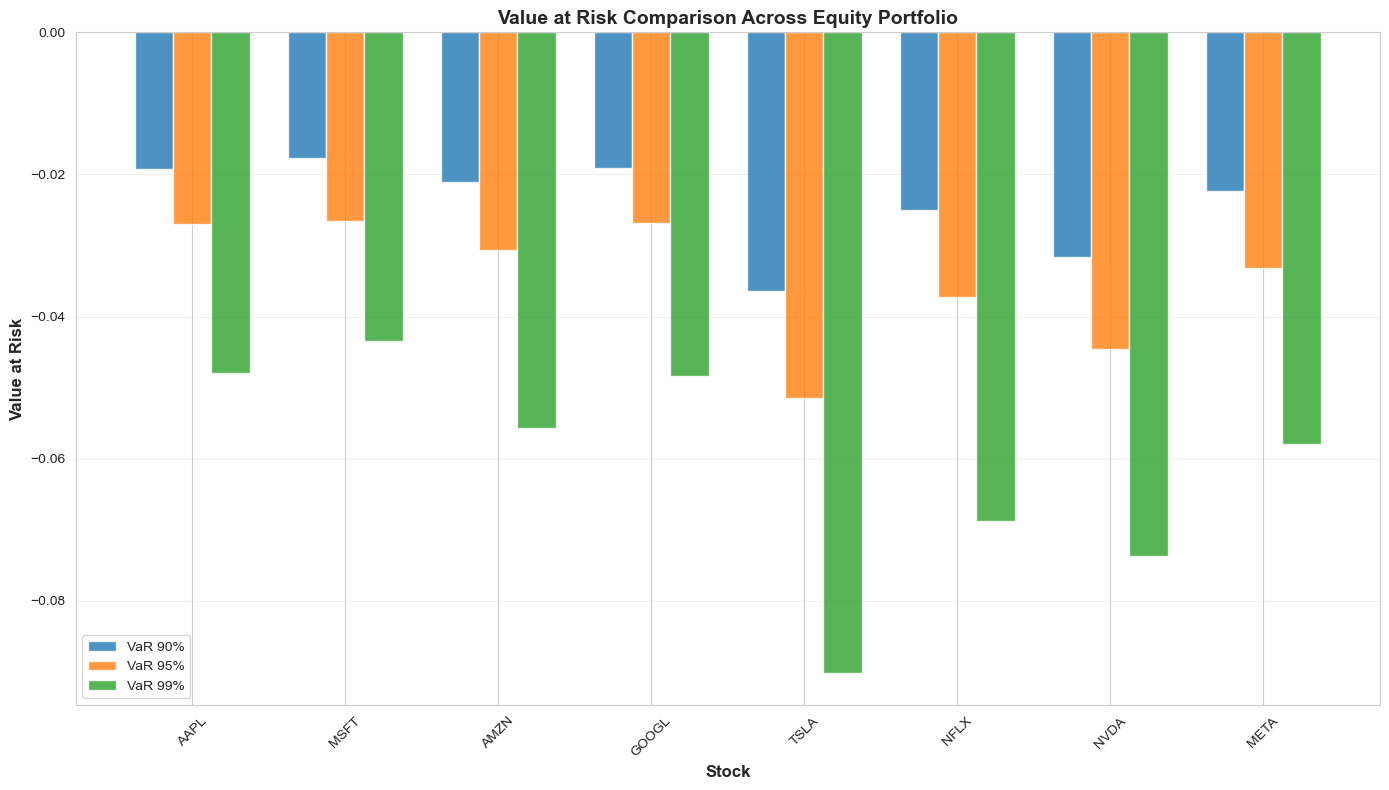

In [17]:
# Plot VaR comparison across stocks
fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(equity_risk_df))
width = 0.25

bars1 = ax.bar(x - width, equity_risk_df['VaR_90'], width, label='VaR 90%', alpha=0.8)
bars2 = ax.bar(x, equity_risk_df['VaR_95'], width, label='VaR 95%', alpha=0.8)
bars3 = ax.bar(x + width, equity_risk_df['VaR_99'], width, label='VaR 99%', alpha=0.8)

ax.set_xlabel('Stock', fontsize=12, fontweight='bold')
ax.set_ylabel('Value at Risk', fontsize=12, fontweight='bold')
ax.set_title('Value at Risk Comparison Across Equity Portfolio', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(equity_risk_df.index, rotation=45)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()

# Save plot
plt.savefig('results/plots/var_comparison.png', dpi=300, bbox_inches='tight')
print("✓ Plot saved to results/plots/var_comparison.png")
plt.show()

✓ Plot saved to results/plots/garch_volatility.png


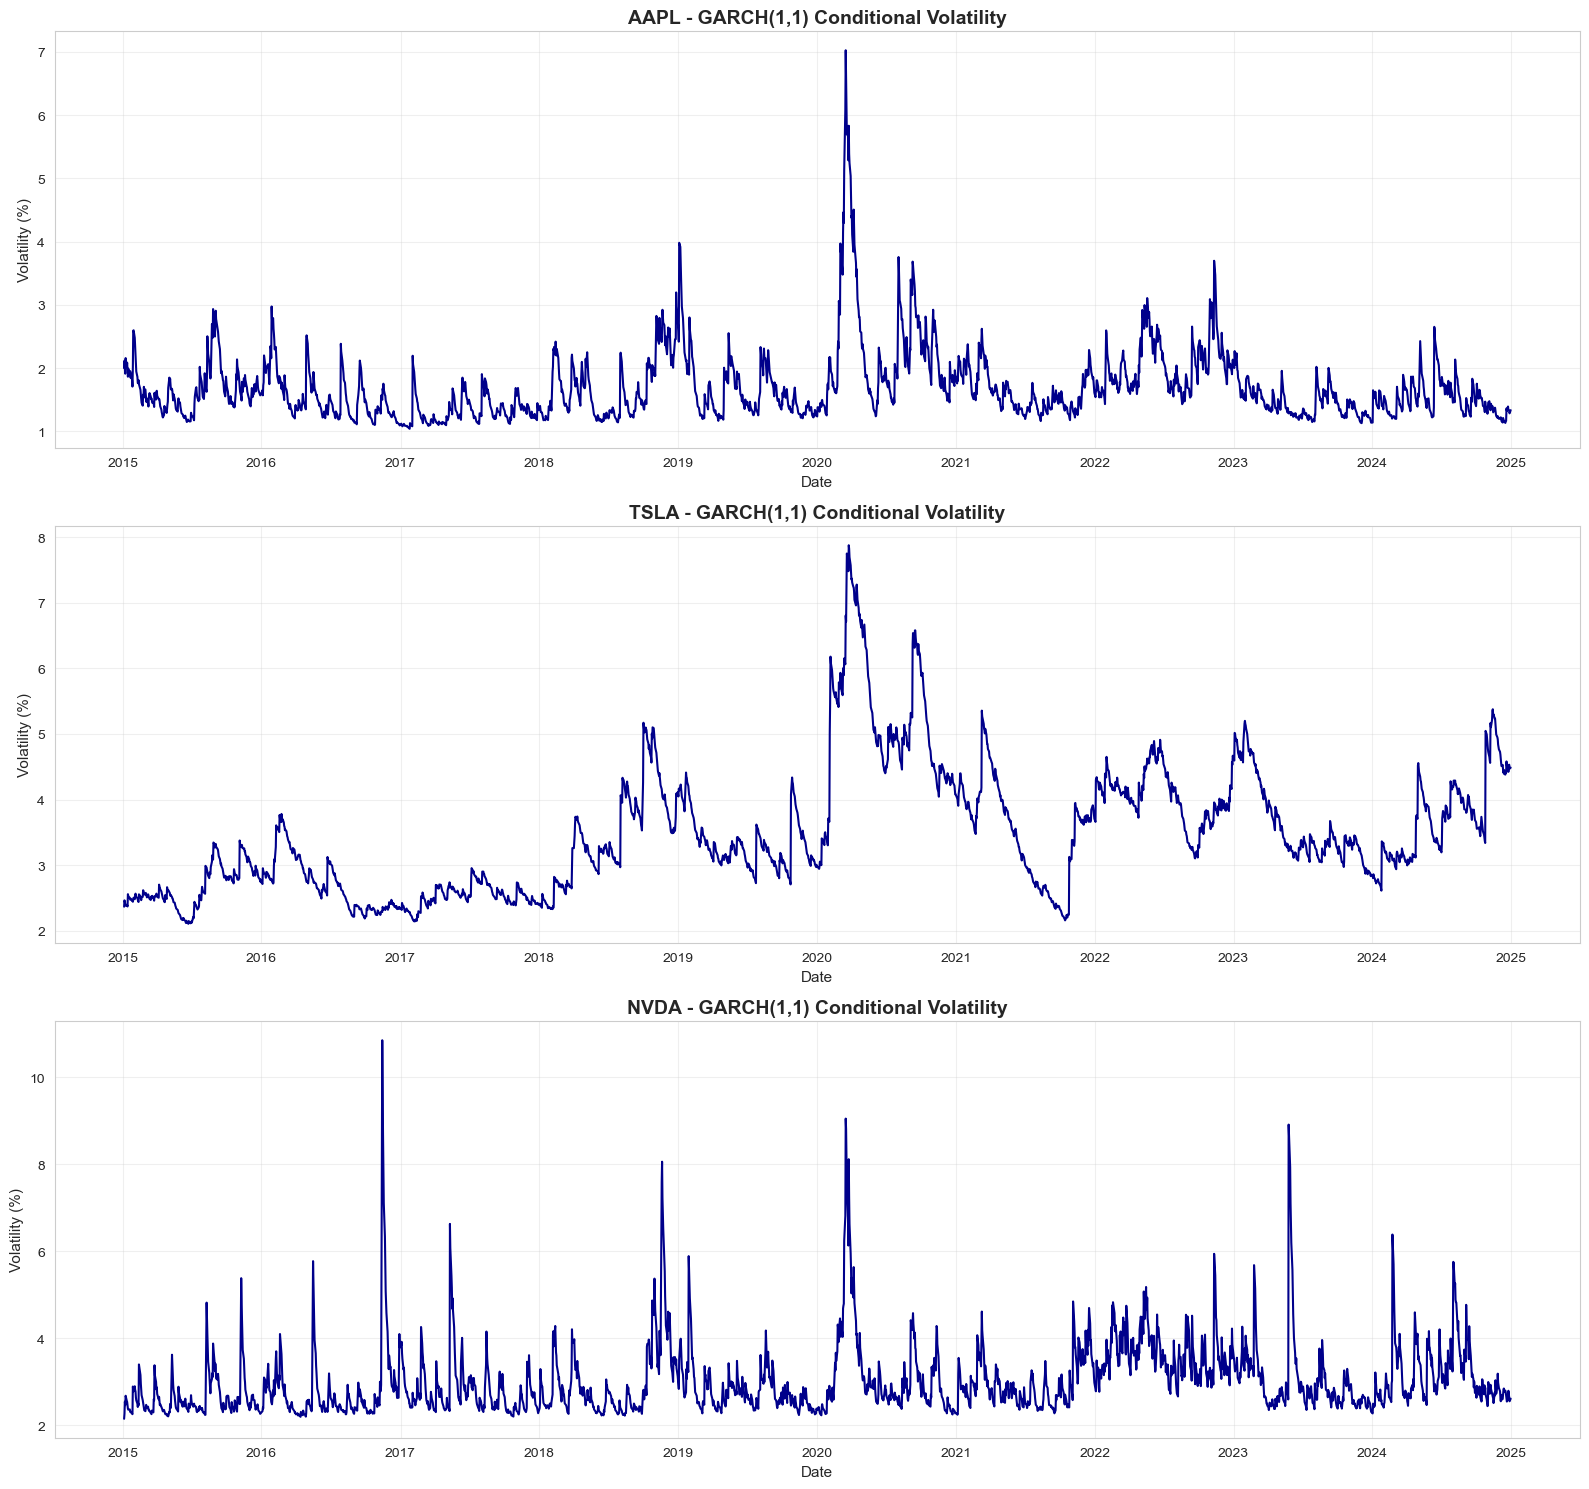

In [18]:
# Plot GARCH conditional volatility for selected stocks
fig, axes = plt.subplots(len(selected_tickers), 1, figsize=(16, 5 * len(selected_tickers)))

if len(selected_tickers) == 1:
    axes = [axes]

for idx, ticker in enumerate(selected_tickers):
    if ticker in garch_models:
        garch_fit = garch_models[ticker]
        axes[idx].plot(garch_fit.conditional_volatility, linewidth=1.5, color='darkblue')
        axes[idx].set_title(f'{ticker} - GARCH(1,1) Conditional Volatility', 
                           fontsize=14, fontweight='bold')
        axes[idx].set_xlabel('Date', fontsize=11)
        axes[idx].set_ylabel('Volatility (%)', fontsize=11)
        axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('results/plots/garch_volatility.png', dpi=300, bbox_inches='tight')
print("✓ Plot saved to results/plots/garch_volatility.png")
plt.show()

✓ Plot saved to results/plots/returns_distribution_var.png


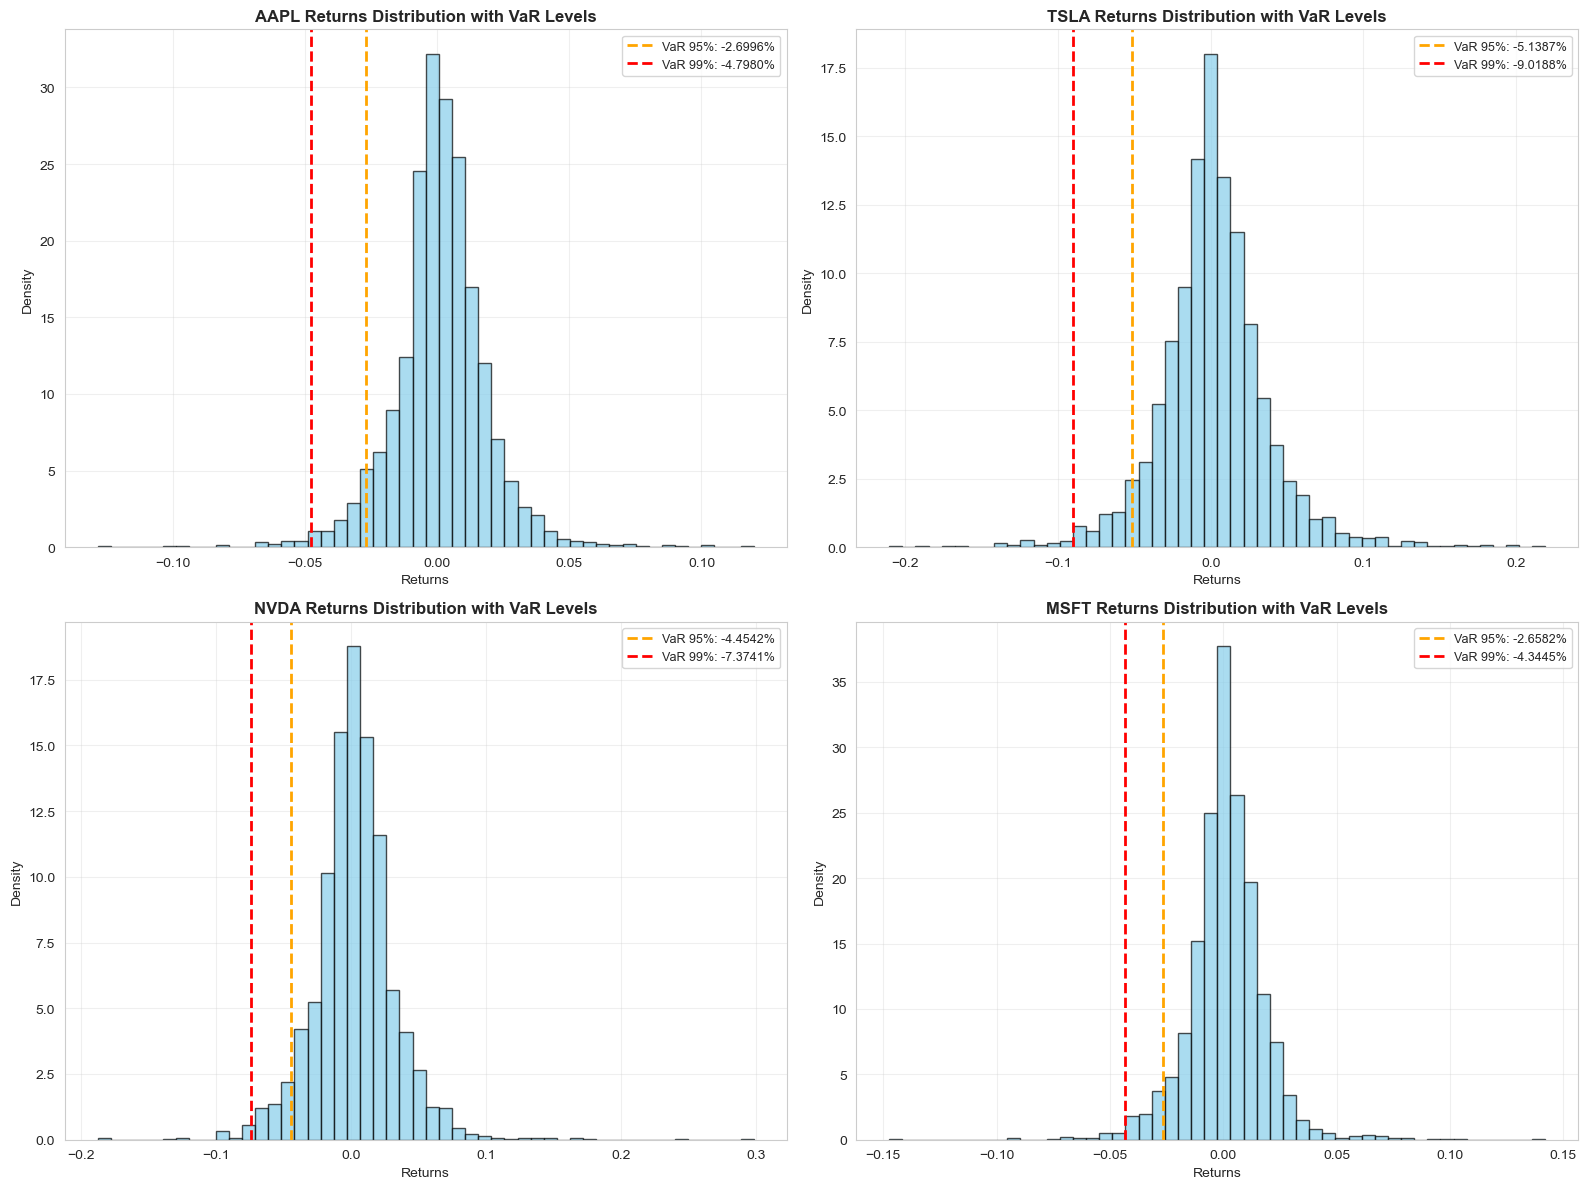

In [19]:
# Plot returns distribution with VaR levels
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Select 4 stocks for visualization
plot_tickers = ['AAPL', 'TSLA', 'NVDA', 'MSFT']

for idx, ticker in enumerate(plot_tickers):
    if ticker in equity_data:
        df = equity_data[ticker]
        close_col = [col for col in df.columns if 'Close' in col][0]
        returns = df[close_col].pct_change().dropna()
        
        # Plot histogram
        axes[idx].hist(returns, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
        
        # Add VaR lines
        var_95 = equity_risk_metrics[ticker]['VaR_95']
        var_99 = equity_risk_metrics[ticker]['VaR_99']
        
        axes[idx].axvline(var_95, color='orange', linestyle='--', linewidth=2, label=f'VaR 95%: {var_95:.4%}')
        axes[idx].axvline(var_99, color='red', linestyle='--', linewidth=2, label=f'VaR 99%: {var_99:.4%}')
        
        axes[idx].set_title(f'{ticker} Returns Distribution with VaR Levels', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Returns', fontsize=10)
        axes[idx].set_ylabel('Density', fontsize=10)
        axes[idx].legend(fontsize=9)
        axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('results/plots/returns_distribution_var.png', dpi=300, bbox_inches='tight')
print("✓ Plot saved to results/plots/returns_distribution_var.png")
plt.show()

## Risk-Return Heatmap

Visualize the relationship between risk and return across the portfolio:

✓ Plot saved to results/plots/risk_heatmap.png


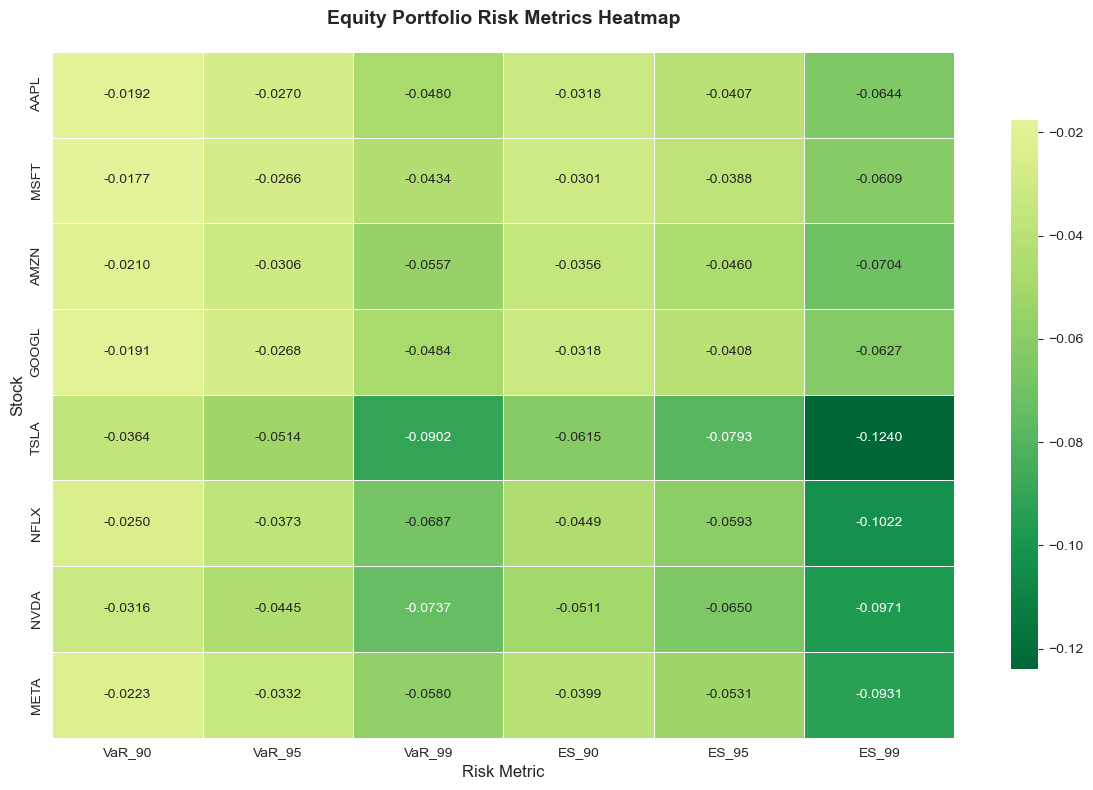

In [20]:
# Create heatmap of risk metrics
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(equity_risk_df, annot=True, fmt='.4f', cmap='RdYlGn_r', 
            center=0, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax)

ax.set_title('Equity Portfolio Risk Metrics Heatmap', fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Risk Metric', fontsize=12)
ax.set_ylabel('Stock', fontsize=12)
plt.tight_layout()

plt.savefig('results/plots/risk_heatmap.png', dpi=300, bbox_inches='tight')
print("✓ Plot saved to results/plots/risk_heatmap.png")
plt.show()

## Summary and Conclusions

### Risk Forecasting Results:

In [21]:
# Final Summary
print("=" * 80)
print("RISK FORECASTING ANALYSIS - SUMMARY")
print("=" * 80)

print(f"\n📊 Data Analyzed:")
print(f"   • Equity Portfolio: {len(equity_data)} stocks")
print(f"   • ETF Portfolio: {len(etf_data)} ETFs")
print(f"   • Sector ETF Portfolio: {len(sector_data)} sector ETFs")

print(f"\n📈 Risk Metrics Calculated:")
print("   • Value at Risk (VaR) at 90%, 95%, 99% confidence levels")
print("   • Expected Shortfall (ES) at 90%, 95%, 99% confidence levels")
print(f"   • GARCH(1,1) models fitted for {len(garch_models)} stocks")

print(f"\n🎯 Key Findings:")
print(f"\n  Most Risky Stock (VaR 95%):")
riskiest = equity_risk_df['VaR_95'].idxmin()
print(f"   • {riskiest}: {equity_risk_df.loc[riskiest, 'VaR_95']:.4%}")

print(f"\n  Least Risky Stock (VaR 95%):")
safest = equity_risk_df['VaR_95'].idxmax()
print(f"   • {safest}: {equity_risk_df.loc[safest, 'VaR_95']:.4%}")

print(f"\n  Average VaR (95%) across portfolio: {equity_risk_df['VaR_95'].mean():.4%}")
print(f"  Average ES (95%) across portfolio: {equity_risk_df['ES_95'].mean():.4%}")

print(f"\n📁 Plots Saved:")
print("   • results/plots/var_comparison.png")
print("   • results/plots/garch_volatility.png")
print("   • results/plots/returns_distribution_var.png")
print("   • results/plots/risk_heatmap.png")

print(f"\n✅ Risk Forecasting Analysis Complete!")
print("=" * 80)

RISK FORECASTING ANALYSIS - SUMMARY

📊 Data Analyzed:
   • Equity Portfolio: 8 stocks
   • ETF Portfolio: 9 ETFs
   • Sector ETF Portfolio: 8 sector ETFs

📈 Risk Metrics Calculated:
   • Value at Risk (VaR) at 90%, 95%, 99% confidence levels
   • Expected Shortfall (ES) at 90%, 95%, 99% confidence levels
   • GARCH(1,1) models fitted for 3 stocks

🎯 Key Findings:

  Most Risky Stock (VaR 95%):
   • TSLA: -5.1387%

  Least Risky Stock (VaR 95%):
   • MSFT: -2.6582%

  Average VaR (95%) across portfolio: -3.4681%
  Average ES (95%) across portfolio: -5.2889%

📁 Plots Saved:
   • results/plots/var_comparison.png
   • results/plots/garch_volatility.png
   • results/plots/returns_distribution_var.png
   • results/plots/risk_heatmap.png

✅ Risk Forecasting Analysis Complete!
